# DeepForward Network

## Data Preprocesing


In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
!ls '/content/gdrive/My Drive/Colab Notebooks/Udemy/machine_learning_examples/data_csv'

legend.txt  readme.txt	X_orig.txt  X.txt  y.txt


In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
url = '/content/gdrive/My Drive/Colab Notebooks/Udemy/machine_learning_examples/data_csv/X.txt'

In [30]:
data = pd.read_csv(url, header=None, delimiter =',' )

In [31]:
data.head()

,0,1,2,3,4,5,6
0,1,1.4821,1.0759,0.66329,0.61975,-1.2836,-1.6232
1,1,1.4821,1.4868,1.57260,0.84226,-1.4649,-1.6232
2,1,1.4821,1.1810,1.18290,0.53969,-1.6461,-1.6232
3,1,1.4821,1.0472,1.18290,0.53616,-1.2836,-1.6232
4,1,1.4821,1.0281,0.92308,0.55500,-1.8273,-1.6232


In [32]:
df = tf.keras.datasets.mnist

In [33]:
(x_train, y_train), (x_test, y_test) = df.load_data()
x_train, x_test = x_train/255, x_test/255

## Build Model


In [34]:
model = tf.keras.models.Sequential( [
 tf.keras.layers.Flatten(input_shape = (28,28)), #probar sin input shape
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation='softmax')                                    
])

In [35]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics  = ['accuracy'])

In [36]:
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.9154 - val_loss: 0.1367 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9586 - val_loss: 0.1040 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9681 - val_loss: 0.0822 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.0796 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9765 - val_loss: 0.0711 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9792 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0683 - val_accuracy:

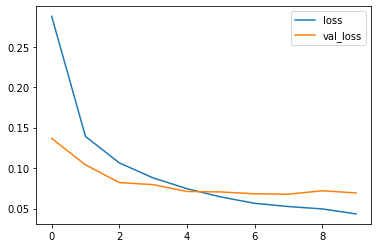

In [37]:
plt.plot(results.history['loss'], label = 'loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.legend()

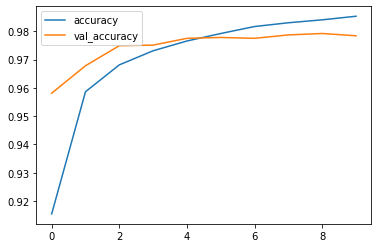

In [38]:
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [39]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9784
[0.0693250223994255, 0.9783999919891357]


In [40]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalize Confusion Matrix')
  else:
    print('Unnormalize Confusion Matrix')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Unnormalize Confusion Matrix
[[ 969    1    1    0    2    0    3    0    3    1]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   6    0 1011    1    2    0    2    2    8    0]
 [   0    0    7  979    0   13    0    4    2    5]
 [   0    0    7    0  955    0    3    3    1   13]
 [   2    0    0    4    1  877    3    1    3    1]
 [   5    2    0    1    4    8  937    0    1    0]
 [   2    4   11    2    0    0    0 1003    1    5]
 [   5    1    2    2    4    6    2    2  945    5]
 [   1    2    0    5   10    3    0    3    1  984]]


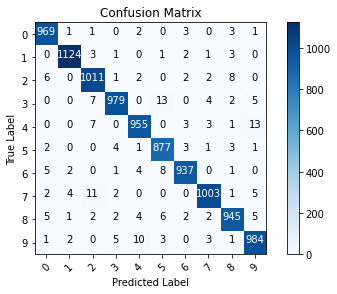

In [41]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

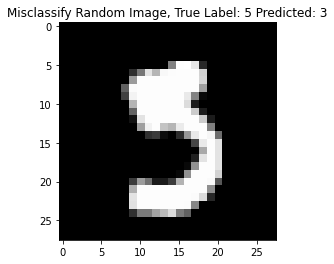

In [49]:
#Miss Classify Samples
misclassify_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassify_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('Misclassify Random Image, True Label: ' + str(y_test[i]) +' Predicted: ' + str(p_test[i]));